In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.datasets import make_blobs

In [11]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

### Ploteando la data real en 3D

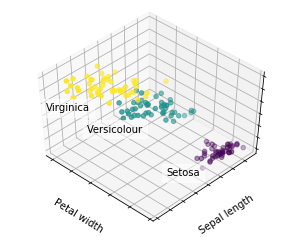

In [20]:
fignum = 1
# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = y.astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

## Evaluando KMeans

In [21]:
from sklearn.cluster import KMeans

X = iris.data
y = iris.target
#np.random.seed(5)
estimators = {'k_means_iris_3': KMeans(n_clusters=3,random_state=140),
              'k_means_iris_8': KMeans(n_clusters=8, random_state=140),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random',random_state=140)}

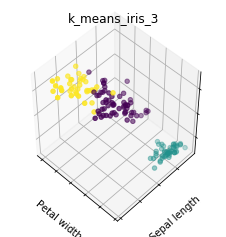

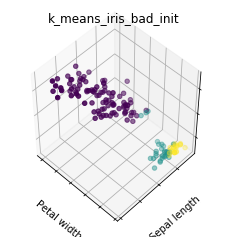

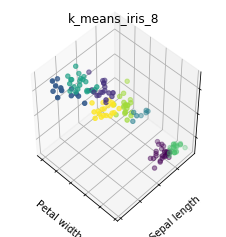

In [23]:
# Mostrando los clusters
fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(3, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    plt.cla()
    est.fit(X)
    labels = est.labels_
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))
    ax.set_title(name)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1
plt.show()

### Errores en KMeans

In [39]:
plt.figure(figsize=(6, 6))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

In [40]:
# Anisotropicly distributed data
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

In [41]:
# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

In [42]:
# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

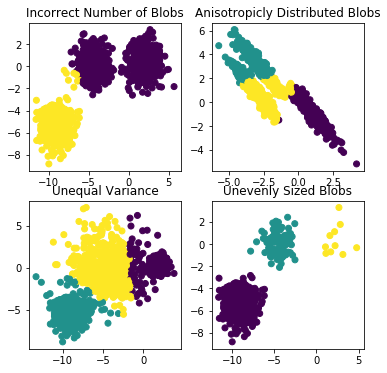

In [43]:
plt.show()

## Clustering basado en Densidad (DBScan)

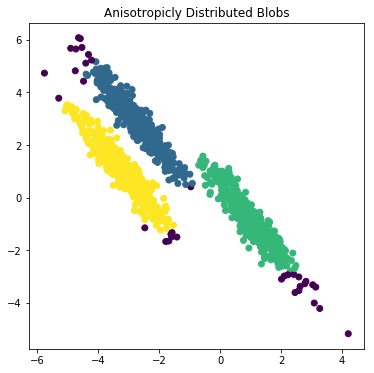

3


In [48]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(6, 6))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = DBSCAN(eps=0.35, min_samples=10).fit_predict(X_aniso)#KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")
plt.show()
#db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = y_pred

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

## Evaluando la Calidad del Agrupamiento

In [49]:
from sklearn.metrics import silhouette_samples, silhouette_score

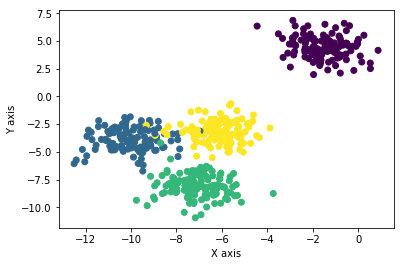

For n_clusters = 2 The average silhouette_score is : 0.704978749608
[ 0.62643517  0.74016134  0.65249208  0.86394454  0.66165245  0.80696245
  0.45547913  0.28653776  0.71810163  0.58907942  0.61377265  0.71892965
  0.45565899  0.86094763  0.66691923  0.74191164  0.69203596  0.70857758
  0.87969871  0.49201356  0.68235011  0.6439099   0.60939025  0.82816278
  0.6226395   0.70179374  0.89639594  0.85495452  0.63515552  0.63950586
  0.72624688  0.87052001  0.58309319  0.7031889   0.4958427   0.6440799
  0.71486796  0.60542121  0.65920322  0.7360256   0.58984064  0.66234893
  0.80562204  0.19410325  0.66186726  0.68571044  0.61545205  0.65231957
  0.88854839  0.81266062  0.8592512   0.70375064  0.73728751  0.54704894
  0.73777943  0.71091344  0.71780772  0.6407557   0.73875877  0.63205923
  0.87589125  0.84066606  0.71205188  0.69968163  0.88185095  0.63625353
  0.71777612  0.54965788  0.67223323  0.7452715   0.72233152  0.65599852
  0.38809585  0.66793515  0.58128132  0.65764886  0.70834

In [53]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4]#2, 3, 4, 5, 6

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    print(sample_silhouette_values)

In [58]:
from sklearn import metrics
for i in np.arange(3,7):
    estimator = KMeans(n_clusters=i)
    estimator.fit(X) 

    print('%i   %.3f   %.3f   %.3f   %.3f'
          % (estimator.inertia_,
             metrics.homogeneity_score(y, estimator.labels_),
             metrics.completeness_score(y, estimator.labels_),
             metrics.adjusted_rand_score(y, estimator.labels_),
             metrics.silhouette_score(X, estimator.labels_)))

1903   0.726   0.969   0.698   0.588
908   0.926   0.926   0.943   0.651
811   0.910   0.807   0.845   0.574
727   0.916   0.732   0.751   0.451
